In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from useful_func import *
import os

In [2]:
fs = 40
fs2 = 40/100

In [3]:
df = pd.read_csv('info_events.csv', index_col=0)
df['Picked arrival'] = pd.to_datetime(df['Picked arrival'])
df['file_start'] = pd.to_datetime(df['file_start'])
diff = (df['Picked arrival']- df['file_start'])
df['diff'] = diff.dt.total_seconds()

df['diff'] = df['diff'].apply(int)
df['signal_to_end'] = np.array([len(np.fromfile(file, dtype = np.int32))/fs for file in df['file']]) - df['diff']
df = df.sort_values(by='Picked arrival')

In [4]:
def get_sta_lta(y, nsta, nlta):
    sta = np.cumsum(y**2)
    sta[nsta:] = sta[nsta:] - sta[:-nsta]
    lta = np.cumsum(y**2)
    lta[nlta:] = lta[nlta:] - lta[:-nlta]
    return sta/lta

def get_sta_lta2(y, ns, nl) :
    sta = signal.convolve(y**2, np.ones(ns), mode='same')
    lta = signal.convolve(y**2, np.ones(nl), mode='same')
    return sta/lta

In [5]:
i = 0
files = df['file'].unique()


In [6]:
i = 0
REQ = df[(df['Tag']=='*') ].index

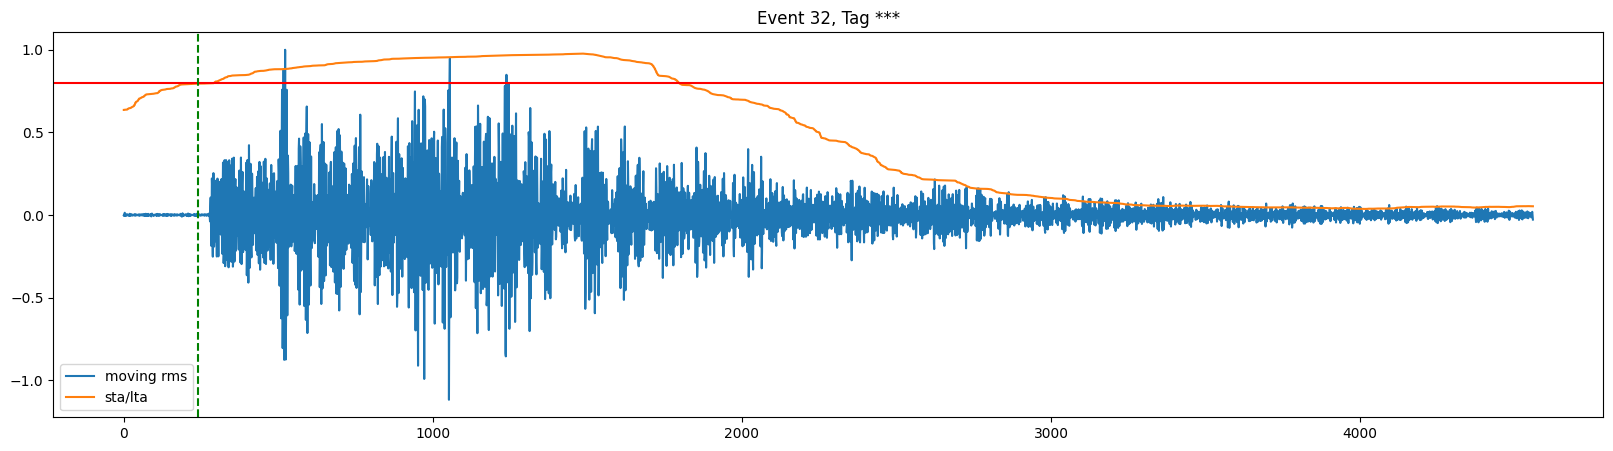

In [7]:
event = REQ[i]
event = 32
y = np.fromfile(df['file'][event], dtype=np.int32)
time = df['diff'][event]
y_s = y[time*fs - 10*60*fs : time*fs + 3*60*60*fs]
y_d = signal.decimate(y_s, int(fs/fs2), ftype='fir')
y_d_f = bp(y_d)

sta = get_sta_lta2(y_d_f, int(100*60*fs2), int(4*60*60*fs2))

plt.figure(figsize=(20,5))

plt.plot( y_d_f/np.max(y_d_f), label='moving rms')
plt.plot( sta, label='sta/lta')
plt.axhline(.8, color='r')
plt.axvline(10*60*fs2, color='g', linestyle='--')
plt.legend()
plt.title(f'Event {event}, Tag {df["Tag"][event]}')
i = (i+1)%len(REQ)

In [8]:
all_files = []
for dossier_actuel, sous_dossiers, fichiers in os.walk('data\DonneesB23'):
    if "_MACOSX" not in dossier_actuel:
        for fichier in fichiers:
            if '.DS_Store' not in fichier:
                path = os.path.join(dossier_actuel, fichier)
                y = np.fromfile(path, dtype=np.int32)
                if len(y)/fs > 2*60*60 :
                    all_files.append(path)
del y
noisy_files = []
known_files = list(df['file'].unique())
for file in all_files :
    if file not in known_files :
        noisy_files.append(file)

In [9]:
i = 10

10


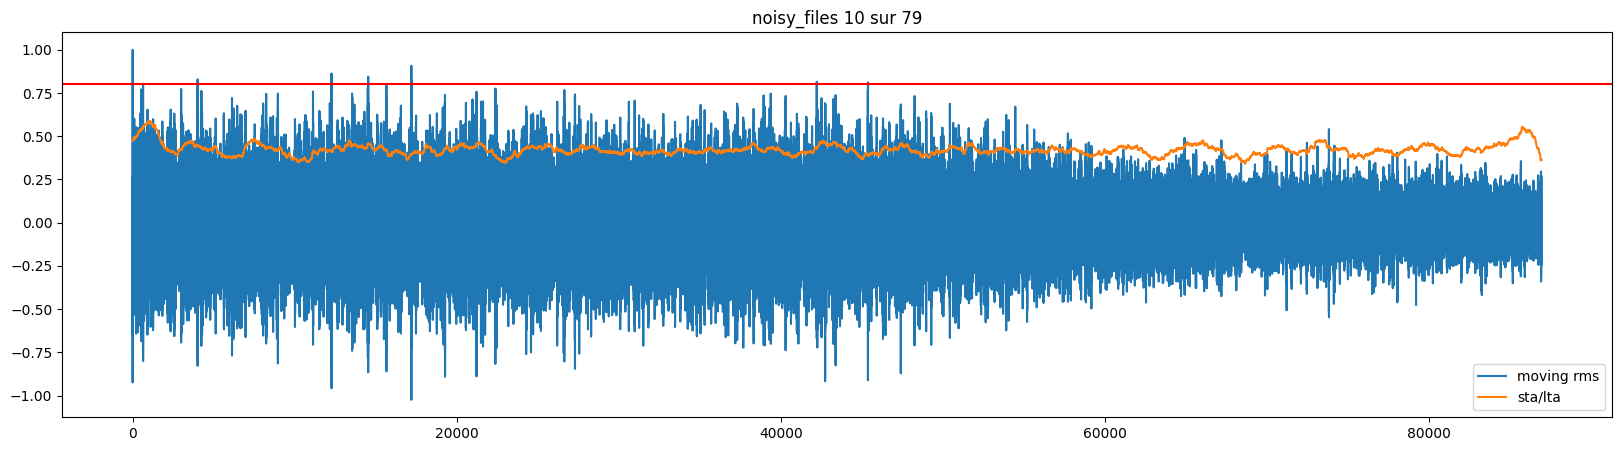

In [10]:
print(i)
file = noisy_files[i]
y = np.fromfile(file, dtype=np.int32)

y_d = signal.decimate(y, int(fs/fs2), ftype='fir')
y_d_f = bp(y_d)

sta = get_sta_lta2(y_d_f, int(100*60*fs2), int(4*60*60*fs2))

plt.figure(figsize=(20,5))

plt.plot( y_d_f/np.max(y_d_f), label='moving rms')
plt.plot( sta, label='sta/lta')
plt.axhline(.8, color='r')
plt.legend()
plt.title('noisy_files '+str(i) + ' sur ' + str(len(noisy_files)))
i = (i+1)%len(noisy_files)

In [11]:
i = 0

28


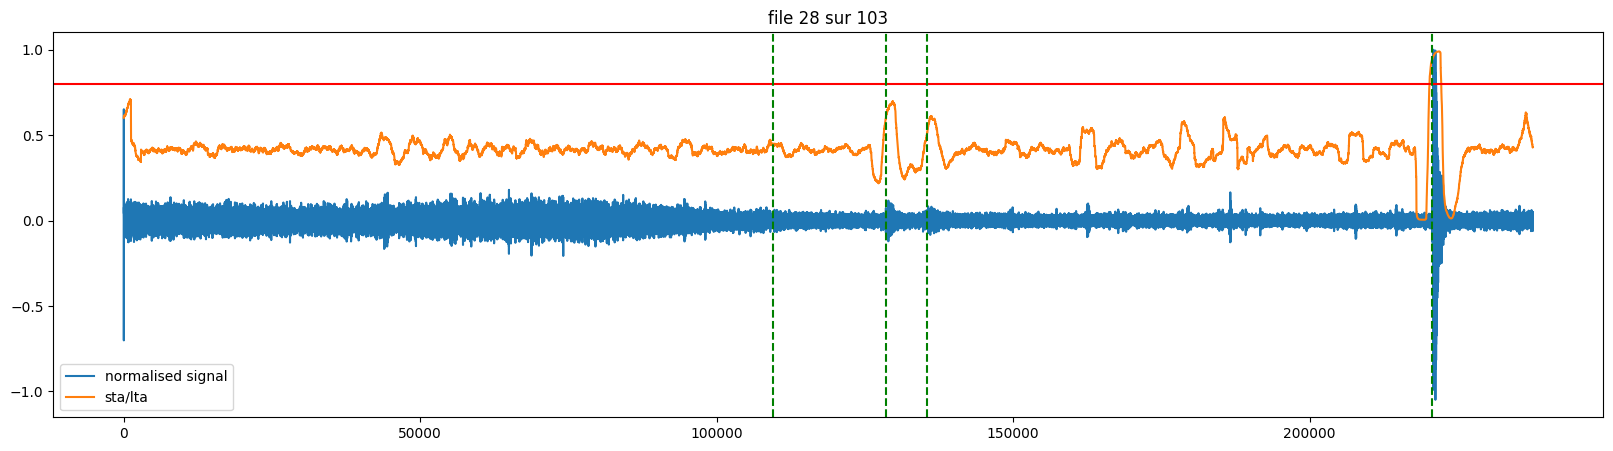

In [40]:
print(i)
file = known_files[i]
y = np.fromfile(file, dtype=np.int32)

y_d = signal.decimate(y, int(fs/fs2), ftype='fir')
y_d_f = bp(y_d)

sta = get_sta_lta2(y_d_f, int(100*60*fs2), int(4*60*60*fs2))

events = df[df['file'] == file]['diff'].to_numpy(np.int32)


plt.figure(figsize=(20,5))

plt.plot( y_d_f/np.max(y_d_f), label='normalised signal')
plt.plot( sta, label='sta/lta')
plt.axhline(.8, color='r')
if len(events) :
    for event in events :
        plt.axvline(event*fs2, color='g', linestyle='--')
plt.legend()
plt.title('file '+str(i) + ' sur ' + str(len(files)))
i = (i+1)%len(known_files)